<a href="https://colab.research.google.com/github/JoseAaronE/FisicaComputacional/blob/master/Evaluacion3/Evaluacion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación 3**

Esquivel Ovilla José Aarón

In [51]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

La [Ecuación de Reacción-Difusión](https://en.wikipedia.org/wiki/Reaction–diffusion_system) en una dimensión está dada por la ecuación diferencial parcial

\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + R(u)
\end{equation*}

donde $D$ es el coeficiente de difusión y $R(u)$ es una función de reacción. La forma de la función $R(u)$, puede describir una colección amplia de fenómenos físicos. 

Comúnmente la ecuación de reacción difusión se utiliza para estudiar la evolución temporal de una mezcla de componentes químicos que reaccionan entre si, por ejemplo

\begin{equation*}
2 H_2 + O_2 \xrightarrow[\leftarrow]{}  2 H_2 O
\end{equation*}

donde se mezclan 2 moleculas de Hidrógeno y una oxígeno, para formar agua, con ayuda de un catalizador que facilite la reacción.

Se pide trabajar el caso donde $R(u) = \alpha u$, 
siendo $\alpha$ el coeficiente de reacción. 

Entonces nos interesa resolver la ecuación

\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + \alpha u
\end{equation*}

Aquí $u$ denotaría la concentración del compuesto químico. Si $\alpha=0$, la ecuación anterior se reduce a una simple ecuación de difusión como la que vimos en la ecuación del calor. 

Supondremos que $D=1$ y $\alpha=-1$. 

Resuelve numéricamente la ecuación de reacción-difusión en una dimensión, para estudiar la evolución de un modelo simple de reacción-difusión de mezclar moleculas de $2 H_2$ con $O_2$
en un tubo unidimensional de longitud $L=1$ en la dirección $x$, y que inicialmente se encuentra vacío $u(x,0)=0$ como se muestra en la siguiente figura

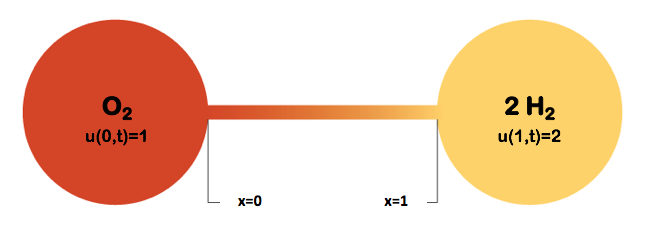


Se pide adaptar el código desarrolado en el sitio del curso de [Numerical Methods using Python](http://people.bu.edu/andasari/courses/numericalpython/python.html) del Dr. Vivi Andasari de la Universidad de Boston.

En la [sesión 15](http://people.bu.edu/andasari/courses/Fall2015/LectureNotes/Lecture15_29Oct2015.pdf), se describen los algoritmos por si desean consultar los detalles. Se resuelve la ecuación de Reacción-Difusión en una dimensión, usando métodos de diferencia finita (Backward Time Centered Space - BTCS).  Se provee el código para problemas de condiciones a la frontera [tipo Dirichlet](http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_DirichletBCs.py) y también para el [tipo Neumann](http://people.bu.edu/andasari/courses/numericalpython/Week9Lecture15/PythonFiles/BTCS_NeumannBCs.py).

Por favor descarga ambos códigos para cada caso, dado que se utilizarán en los siguientes 2 problemas.  

**Problema 1:** 

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


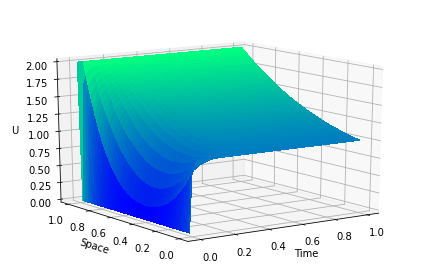

In [56]:
#Condiciones de la frontera tipo Dirichlet

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval
#Tamaño
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)
#Puntos en  t
t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)
#Usamos la suposición que se dio en la explicación del inicio 
D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
#Cambiamos la condición inicial
U[:,0] = 0

#----- Dirichlet boundary conditions -----
#Cambiamos las condiciones de frontera
U[0,:] = 1
U[-1,:] = 2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.winter, antialiased=False)


#Grafica de la solución 
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
ax.view_init(15, -125)
plt.show()

Sabemso que $u$ denotaría la concentración del compuesto químico, entonces podemos observar que al momento de $u(x,0)=0$ , efectivamente se encuantra en 0, pero que casi inmediatamente con la primera condición de frontera en $u(0,t)=1$ en $t = 0$ y aparece una molecula junto con la segunda condición de frontera que es $u(1,t)=2$, para un tiempo $t=1$. y conforme pasa el tiempo podemos ver que se va llenando 

**Problema 2:**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$  y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


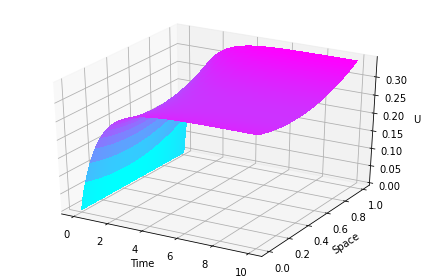

In [53]:

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval
#Tamaño 
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)
#Tiempo en los que calcularemos la solución 
t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)
#Se modificaron estos coeficientes de acuerdo con la explicación del inicio
D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s

#Puntos en x y en t
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition ----- cambiamos la condición inicial a 0 
U[:,0] = 0

#----- Neumann boundary conditions -----
leftBC = np.arange(1, N+1)
#Modificamos esta parate para que nos de el mismo tamaño que leftBC y el codigo pueda compilar bien 
f = np.ones([N +1,1]) *0.1

rightBC = np.arange(1, N+1)
#Modificamos esta parate para que nos de el mismo tamaño que rightBC y el codigo pueda compilar bien 
g = np.ones([N+1,1]) *0.2

#Empezamos a hacer el calculo necesario con un for en el rango deseado 
for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.cool, antialiased=False)


#Grafica de la solución 
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()


Podemos notar como $u(x,0) = 0$ se cumple la condición y que el algún punto parece que llega a una estabilidad, pero que vuelve a crecer 

**Problema 3:**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el  mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso. 

True


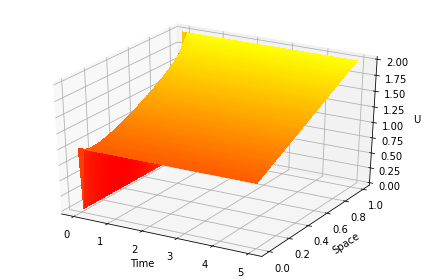

In [54]:
#Condiciones de la frontera tipo Dirichlet

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval
#Tamaño
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)
#Puntos en t
t0 = 0
tF = 5

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;
#Puntos en x y en t
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
#Condición inicial que se nos da 
U[:,0] = 0

#----- Dirichlet boundary conditions -----
#Modificamos las condiciones de frontera que se nos dan 
U[0,:] = 1
U[-1,:] = 2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.autumn, antialiased=False)


#Hacemos la grafica de la solución
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Siendo $\alpha$ el coeficiente de reacción,podemos notar, que el resultado se parece demasiado al del ejercicio 1, con la difererncia de que en el ejercicio 1 tenemos un coeficiente $\alpha=-1$, y en este ejercicio tenemos un coeficiente $\alpha=0$(no hay reacción),por lo que podemos decir que el coeficiente $\alpha$ nos dice que tanta concentración va a tener el recipiente $u$, mientras más grande sea $\alpha$ mayor concentración tendremos.
Como en estos dos ejercicios el coeficiente $\alpha$ no cambia mucho, no notamos mucho la diferencia, pero si cambiamos el coefieciente por uno más grande o pequeño podremos notar como las soluciones no se van a parecer.